In [1]:
#pip install opencv-contrib-python

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img0 = cv2.imread('18369-0-2-50X-2 copy 2.jpg')                #read any image
gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY) #makes from RGB gray scale [3]->[1]

img1_cleared = ((gray0*0+255)).astype(np.uint8)# clear a copy of the orginal image - make white
img2_cleared = ((gray0*0+255)).astype(np.uint8)# clear a copy of the orginal image - make white

def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))  # Flip kernel for convolution
    xKernShape, yKernShape = kernel.shape
    xImgShape, yImgShape = image.shape

    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    if padding != 0:
        imagePadded = np.zeros((xImgShape + padding*2, yImgShape + padding*2))
        imagePadded[padding:-padding, padding:-padding] = image
    else:
        imagePadded = image

    for y in range(0, yImgShape, strides):
        if y > yImgShape - yKernShape:
            break
        for x in range(0, xImgShape, strides):
            if x > xImgShape - xKernShape:
                break
            output[x, y] = (kernel * imagePadded[x:x + xKernShape, y:y + yKernShape]).sum()
    return output
    
# Apply Canny edge detection
edges = cv2.Canny(gray0, 100, 200)      # Is this a trained AI model ?

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Is this a trained AI model ?


# Draw FILLED contours onto cleared original image img2_cleared
for contour in contours:
    cv2.drawContours(img1_cleared, [contour], -1, (0,255,0), -1)

In [4]:
a,b = np.shape(gray0)

cnt_black=0;
cnt_all=a*b

for i in range(a):            
    j=0                       
    for j in range(b):        
        if img1_cleared[i,j]==gray0[i][j]: #if same make white
            img2_cleared[i,j]=255
        else:
            img2_cleared[i,j]=0 #else make black
            cnt_black=cnt_black+1

print(cnt_black)
print(cnt_all)
print(cnt_black/cnt_all)

1103853
1235000
0.8938080971659919


Text(0.5, 1.0, 'control Image')

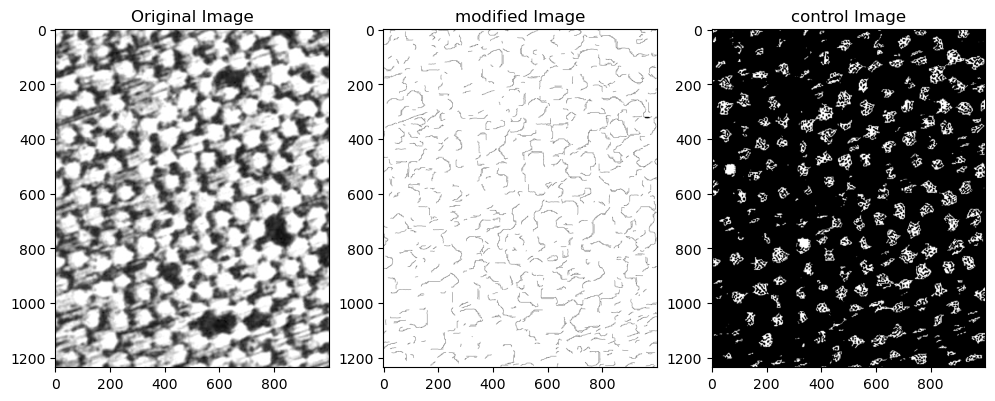

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray0, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(img1_cleared, cmap='gray', vmin=0, vmax=255)
plt.title('modified Image')

plt.subplot(1, 3, 3)
plt.imshow(img2_cleared, cmap='gray', vmin=0, vmax=255)
plt.title('control Image')
